In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

raw_data = load_boston()
print(raw_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df["PRICE"] = raw_data.target
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Binning & Smooting

Data içinde bulunan "DIS" değişkeninde Evin Bostondaki iş merkezlerine uzaklığı ağırlıklı olarak hesaplanmış. Bu değişkeni farklı yöntemler kullanarak Ayrıklaştırmak istiyoruz.  

[]

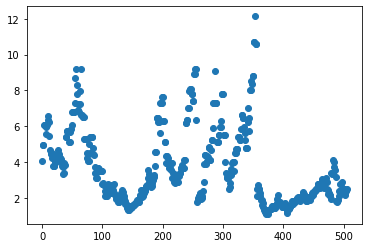

In [4]:
# Bu scatterplotı Ayrıklaştırma işlemi yapıldıktan sonraki hali ile karşılaştırabilirsiniz
DIS = df.DIS
x = np.arange(len(DIS))
plt.scatter(x, DIS)
plt.plot()

### Soru

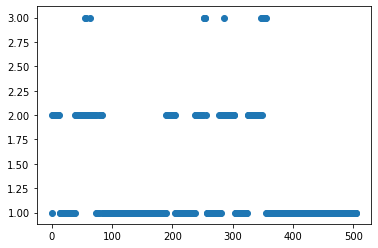

In [41]:
# y değişkeninin için pd.cut fonksiyonunu kullanarak df.DIS 'ın ayrıklaştırılmış hali ile doldurun 
# NOT: bins parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
new_DIS, bins = pd.cut(df.DIS, bins = 3, retbins = True, labels =[1,2,3])
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.cut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [42]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("Equal-width")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1186031   4.79523333  8.46086667 12.1265    ]

 Ayrık değerlerin görülme sayısı
1    365
2    125
3     16
Name: DIS, dtype: int64 


Equal-width


### Soru 

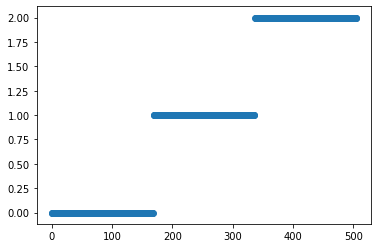

In [7]:
# aynı işlemi pd.qcut kullanarak yapın
# NOT: q parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
new_DIS, bins = pd.qcut(x, q = 3, retbins = True, labels = [0,1,2])
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.qcut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [8]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("Equal-frequency")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [  0.         168.33333333 336.66666667 505.        ]

 Ayrık değerlerin görülme sayısı
0    169
1    168
2    169
dtype: int64 


Equal-frequency


# Feature Generation

Bu bölümde var olan değişkenlerden yeni değişkenler üretelim.

In [9]:
df2 = df.copy()
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# seçtiğiniz iki değişkenin toplamından yeni bir değişken üretin

In [11]:
df2['ZN+INDUS'] = df2.ZN + df2.INDUS
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,ZN+INDUS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,20.31
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,7.07
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,7.07
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2.18
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,11.93
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,11.93
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,11.93
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,11.93


In [12]:
# seçtiğiniz iki değişkenin farkından yeni bir değişken üretin

In [13]:
df2['CRIM-CHAS'] = df2.CRIM + df2.CHAS
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,ZN+INDUS,CRIM-CHAS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,20.31,0.00632
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,7.07,0.02731
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,7.07,0.02729
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2.18,0.03237
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2.18,0.06905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,11.93,0.06263
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,11.93,0.04527
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,11.93,0.06076
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,11.93,0.10959


In [14]:
# seçtiğiniz iki değişkenin bölümünden yeni bir değişken üretin

In [15]:
df2['PRICE/RAD'] = df2.PRICE / df2.RAD
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,ZN+INDUS,CRIM-CHAS,PRICE/RAD
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,20.31,0.00632,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,7.07,0.02731,10.800000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,7.07,0.02729,17.350000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2.18,0.03237,11.133333
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2.18,0.06905,12.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,11.93,0.06263,22.400000
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,11.93,0.04527,20.600000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,11.93,0.06076,23.900000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,11.93,0.10959,22.000000


In [16]:
# seçtiğiniz iki değişkenin çarpımından yeni bir değişken üretin

In [17]:
df2['DIS*TAX'] = df2.DIS * df2.TAX
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,ZN+INDUS,CRIM-CHAS,PRICE/RAD,DIS*TAX
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,20.31,0.00632,24.000000,1210.6400
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,7.07,0.02731,10.800000,1202.0382
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,7.07,0.02729,17.350000,1202.0382
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2.18,0.03237,11.133333,1345.8084
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2.18,0.06905,12.066667,1345.8084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,11.93,0.06263,22.400000,676.6578
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,11.93,0.04527,20.600000,624.4875
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,11.93,0.06076,23.900000,591.7275
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,11.93,0.10959,22.000000,652.1697


sklearn kütüphanesindeki PolynomialFeatures'ı kullanarak yeni featurelar üretin (NOT:Hedef değişkeni(PRICE) yeni featureları üretirken kullanmayın.)

In [18]:
# PolynomialFeatures kullandığınız python kodunu buraya yazabilirsiniz.

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, interaction_only = False)

In [20]:
df2_price = df.drop(['PRICE'], axis=1)
df2_price.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
pd.DataFrame(poly.fit_transform(df2_price))

,0,1,2,3,4,5,6,7,8,9,...,550,551,552,553,554,555,556,557,558,559
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,3581.577,92910.3210,1165.7682,2.410203e+06,30241.39860,379.44612,6.252350e+07,7.844975e+05,9843.278760,123.505992
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,5639.752,125753.7960,2895.9176,2.804027e+06,64572.45480,1487.00488,6.252350e+07,1.439821e+06,33156.867240,763.551944
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,5639.752,124464.2572,1276.8652,2.746814e+06,28179.26722,289.08802,6.061972e+07,6.218911e+05,6379.912747,65.450827
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,6539.203,137998.1647,1028.0886,2.912204e+06,21695.96814,161.63532,6.145685e+07,4.578545e+05,3411.023868,25.412184
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,6539.203,138791.9610,1863.8477,2.945804e+06,39559.41990,531.24643,6.252350e+07,8.396328e+05,11275.492410,151.419437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,...,9261.000,172867.5900,4264.4700,3.226779e+06,79601.40930,1963.68690,6.023168e+07,1.485855e+06,36654.553711,904.231063
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,...,9261.000,175032.9000,4004.2800,3.308122e+06,75680.89200,1731.37440,6.252350e+07,1.430369e+06,32722.976160,748.613312
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,...,9261.000,175032.9000,2487.2400,3.308122e+06,47008.83600,668.00160,6.252350e+07,8.884670e+05,12625.230240,179.406144
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,...,9261.000,173511.4500,2857.6800,3.250861e+06,53540.67600,881.79840,6.090720e+07,1.003123e+06,16521.122880,272.097792


# Normalizasyon

In [23]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

sklearn kütüphanesindeki Min-max scalerı kullanarak datayı normalize edip yeni bir dataframe içine atayın 

In [25]:
mms = MinMaxScaler(feature_range = (-1,1))
norm_data = mms.fit_transform(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE']])
df_mms = pd.DataFrame(norm_data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'])
df_mms

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-1.000000,-0.64,-0.864370,-1.0,-0.370370,0.155011,0.283213,-0.461594,-1.000000,-0.583969,-0.425532,1.000000,-0.820640,-0.155556
1,-0.999528,-1.00,-0.515396,-1.0,-0.654321,0.095995,0.565396,-0.302076,-0.913043,-0.790076,0.106383,1.000000,-0.591060,-0.262222
2,-0.999529,-1.00,-0.515396,-1.0,-0.654321,0.388772,0.198764,-0.302076,-0.913043,-0.790076,0.106383,0.979475,-0.873068,0.320000
3,-0.999414,-1.00,-0.873900,-1.0,-0.699588,0.317111,-0.116375,-0.102911,-0.826087,-0.866412,0.297872,0.988552,-0.933223,0.262222
4,-0.998590,-1.00,-0.873900,-1.0,-0.699588,0.374210,0.056643,-0.102911,-0.826087,-0.866412,0.297872,1.000000,-0.801325,0.386667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.998734,-1.00,-0.159091,-1.0,-0.226337,0.161908,0.363543,-0.754658,-1.000000,-0.671756,0.787234,0.975238,-0.561810,-0.226667
502,-0.999124,-1.00,-0.159091,-1.0,-0.226337,-0.019352,0.520082,-0.789413,-1.000000,-0.671756,0.787234,1.000000,-0.594371,-0.306667
503,-0.998776,-1.00,-0.159091,-1.0,-0.226337,0.308680,0.814624,-0.811238,-1.000000,-0.671756,0.787234,1.000000,-0.784216,-0.160000
504,-0.997679,-1.00,-0.159091,-1.0,-0.226337,0.238935,0.779609,-0.770972,-1.000000,-0.671756,0.787234,0.982601,-0.737859,-0.244444


sklearn kütüphanesindeki StandardScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [26]:
std = StandardScaler()
norm_data2 = std.fit_transform(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE']])
df_std = pd.DataFrame(norm_data2, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'])
df_std

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


sklearn kütüphanesindeki RobustScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [27]:
rbs = RobustScaler()
norm_data3 = rbs.fit_transform(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE']])
df_rbs = pd.DataFrame(norm_data3, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'])
df_rbs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681,0.351097
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889,0.050157
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634,1.692790
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579,1.529781
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699,1.880878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.173509,0.0,0.200000,0.521003,-0.171254,-0.236007,-0.20,-0.147287,0.696429,0.026382,-0.168916,0.150470
502,-0.058759,0.00,0.173509,0.0,0.200000,-0.119919,-0.016310,-0.297887,-0.20,-0.147287,0.696429,0.261902,-0.227886,-0.075235
503,-0.054450,0.00,0.173509,0.0,0.200000,1.039973,0.275229,-0.336744,-0.20,-0.147287,0.696429,0.261902,-0.571714,0.338558
504,-0.040867,0.00,0.173509,0.0,0.200000,0.793360,0.240571,-0.265053,-0.20,-0.147287,0.696429,0.096414,-0.487756,0.100313


# Correlation & Covariance

Bu hücrede değişkenlerin birbiri ile olan korelasyonları heatmap kullanarak görselleştirildi.<br>
Aşağıdaki sorular bu görseli incelemeye ve yorumlamaya yönelik olacaktır.


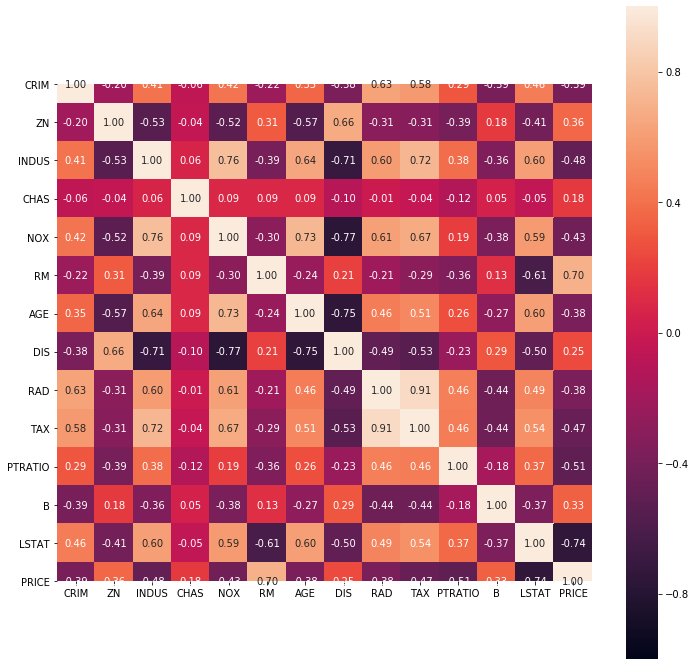

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, square=True, annot=True, fmt='.2f')
plt.show()

Aşağıda örnek iki değişken için scatter plot çizilmiştir.

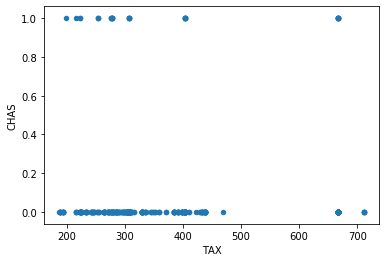

In [29]:
df.plot.scatter("TAX","CHAS")
plt.show()
# scatter plot çizerken buradan kopya çekebilirsiniz :)

Yukarıdaki heatmapten birbiri ile pozitif yüksek korelasyona sahip iki değişken için scatter plot çiziniz. Bir iki cümle ile görseli yorumlamaya çalışınız. Not:Yorum yaparken değişkenlerin yukarıdaki açıklamalarından faydalanabilirsiniz.

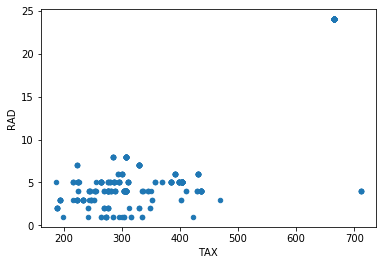

Birbiri ile korelasyonları 0.91 olan RAD ve TAX verilerine baktığımızda pozitif yüksek bir korelasyon görüyoruz. Yani bir başka deyişle otoyollara yakınlaştıkça vergi oranımız artmaktadır.


In [30]:
df.plot.scatter("TAX","RAD")
plt.show()

print("Birbiri ile korelasyonları 0.91 olan RAD ve TAX verilerine baktığımızda pozitif yüksek bir korelasyon görüyoruz. Yani bir başka deyişle otoyollara yakınlaştıkça vergi oranımız artmaktadır.")

Heatmapten faydalanarak negatif korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız

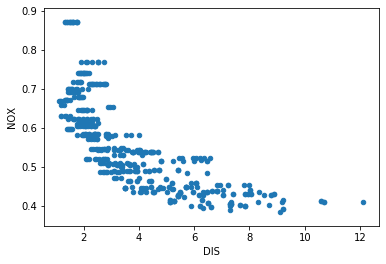

DIS ve NOX kolonlarını birbiri ile incelediğimizde bir ters orantıdan bahsedebiliriz çünkü korelasyon oranlarının -0.77 olmasından da anlayacağımız üzere evin Boston merkeze olan uzaklığı azaldıkça -yani yakınlaştıkça- nitrik oksit konsantrasyonu artacaktır.


In [31]:
df.plot.scatter("DIS","NOX")
plt.show()

print("DIS ve NOX kolonlarını birbiri ile incelediğimizde bir ters orantıdan bahsedebiliriz çünkü korelasyon oranlarının -0.77 olmasından da anlayacağımız üzere evin Boston merkeze olan uzaklığı azaldıkça -yani yakınlaştıkça- nitrik oksit konsantrasyonu artacaktır.")

Heatmapten faydalanarak düşük korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız.

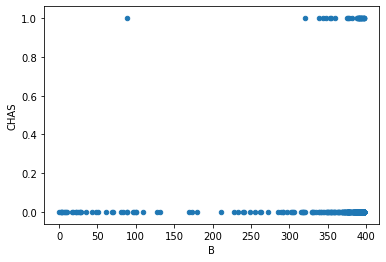

B ve CHAS değişkenleri arasındaki oran %5 dir yani aralarında pek fazla anlamlı bir ilişkiden bahsedemeyiz. Bir başka deyişle şehirdeki siyahilerin oranıyla otoyolun nehri sınırlayıp sınırlamaması arasındaki ilişki bizim için pek önemli değildir.


In [32]:
df.plot.scatter("B","CHAS")
plt.show()

print("B ve CHAS değişkenleri arasındaki oran %5 dir yani aralarında pek fazla anlamlı bir ilişkiden bahsedemeyiz. Bir başka deyişle şehirdeki siyahilerin oranıyla otoyolun nehri sınırlayıp sınırlamaması arasındaki ilişki bizim için pek önemli değildir.")

### Soru

<b>Adım 1 :</b>df.cov() methodunu kullanarak datasetteki covariance değerlerini hesaplayın.<br> 
sns.heatmap ile bu methodu görselleştirin (IPUCU: Yukarıda korelasyon gösteriminde kullanılan yöntemin aynısı)
heatmap için vmin ve vmax parametrelerini kullanmayın.

In [33]:
df.cov()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,73.986578,-40.215956,23.992339,-0.122109,0.419594,-1.325038,85.405322,-6.876722,46.847761,844.821538,5.399331,-302.381816,27.986168,-30.718508
ZN,-40.215956,543.936814,-85.412648,-0.252925,-1.396148,5.112513,-373.901548,32.629304,-63.348695,-1236.453735,-19.776571,373.721402,-68.783037,77.315176
INDUS,23.992339,-85.412648,47.064442,0.109669,0.607074,-1.887957,124.513903,-10.228097,35.549971,833.360290,5.692104,-223.579756,29.580270,-30.520823
CHAS,-0.122109,-0.252925,0.109669,0.064513,0.002684,0.016285,0.618571,-0.053043,-0.016296,-1.523367,-0.066819,1.131325,-0.097816,0.409409
NOX,0.419594,-1.396148,0.607074,0.002684,0.013428,-0.024603,2.385927,-0.187696,0.616929,13.046286,0.047397,-4.020570,0.488946,-0.455412
RM,-1.325038,5.112513,-1.887957,0.016285,-0.024603,0.493671,-4.751929,0.303663,-1.283815,-34.583448,-0.540763,8.215006,-3.079741,4.493446
AGE,85.405322,-373.901548,124.513903,0.618571,2.385927,-4.751929,792.358399,-44.329379,111.770846,2402.690122,15.936921,-702.940328,121.077725,-97.589017
DIS,-6.876722,32.629304,-10.228097,-0.053043,-0.187696,0.303663,-44.329379,4.434015,-9.068252,-189.664592,-1.059775,56.040356,-7.473329,4.840229
RAD,46.847761,-63.348695,35.549971,-0.016296,0.616929,-1.283815,111.770846,-9.068252,75.816366,1335.756577,8.760716,-353.276219,30.385442,-30.561228
TAX,844.821538,-1236.453735,833.360290,-1.523367,13.046286,-34.583448,2402.690122,-189.664592,1335.756577,28404.759488,168.153141,-6797.911215,654.714520,-726.255716


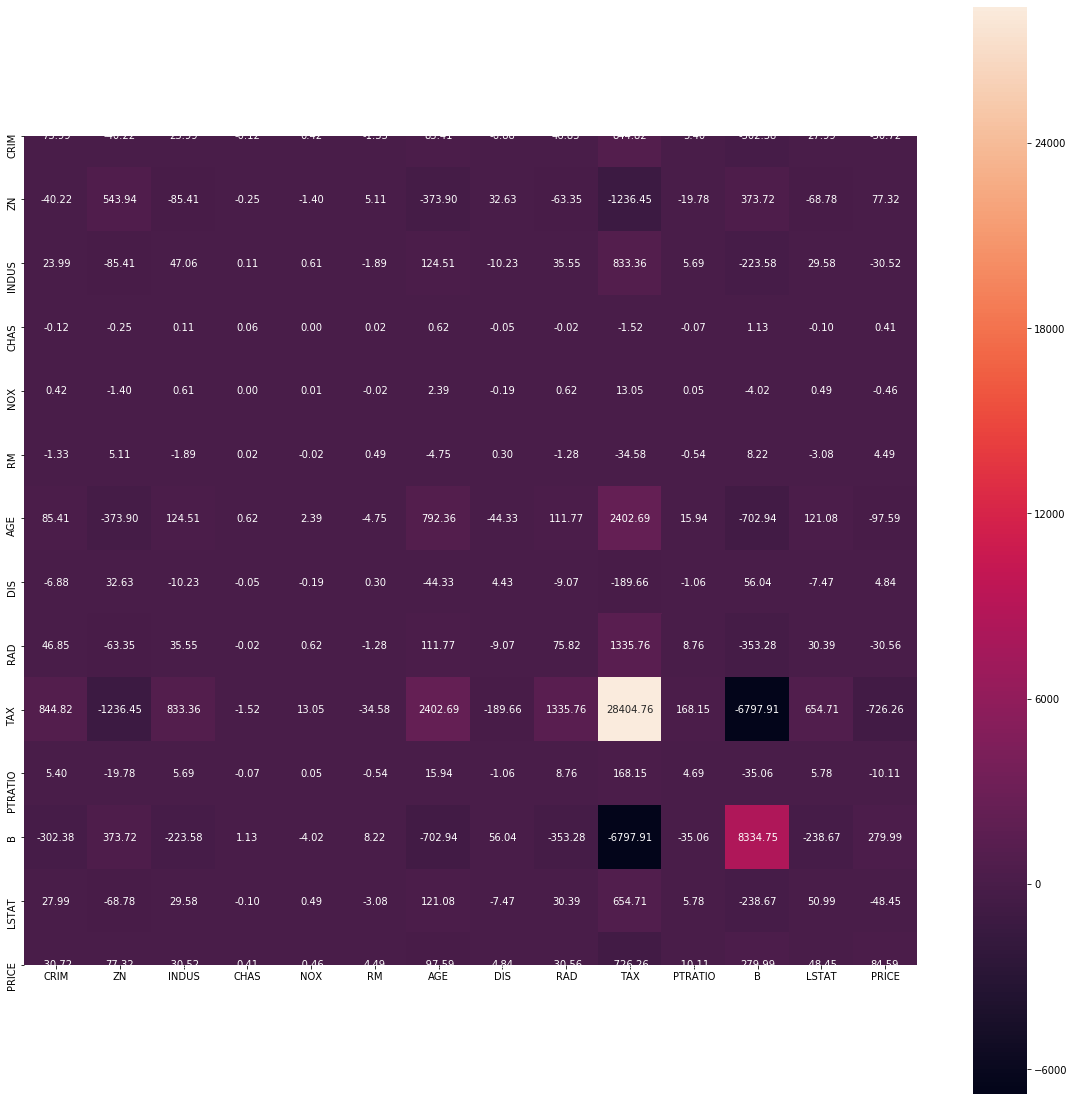

In [34]:
# Heatmap için python kodunu bu hücreye yazın
plt.figure(figsize=(20,20))
sns.heatmap(df.cov(), square=True, annot=True, fmt='.2f')
plt.show()
# Bilgi: Kovaryans değerinden anlam çıkartmak korelasyona göre daha zor çıkan grafikten bunu farkedebilirsiniz.

<b>Adım 2 :</b> Şimdi sklearn.preprocessing paketi içindeki StandardScaler objesini kullanarak datayı standardize edin ve bunu ayrı bir dataframede tutun. Standardize edilmiş dataframe objesinin Kovaryans değerini tekrar hesaplatıp görselleştirin.

<br>IPUCU : standardScalerdan gelen dönüştürülmüş datayı tekrar pandas DataFrame objesine çevirin ve bunu yaparken kolon adlarını kaybetmemeye çalışın örn: pd.DataFrame(standardize_numpy_datası, columns=df.columns)

In [35]:
# Heatmap için python kodunu bu hücreye yazın

stdsc = StandardScaler() 
norm_data = stdsc.fit_transform(df)
norm_data = pd.DataFrame(df_std, columns = df.columns)

# Bilgi: Ortaya çıkan grafik korelasyon grafiğine benziyor mu? :)

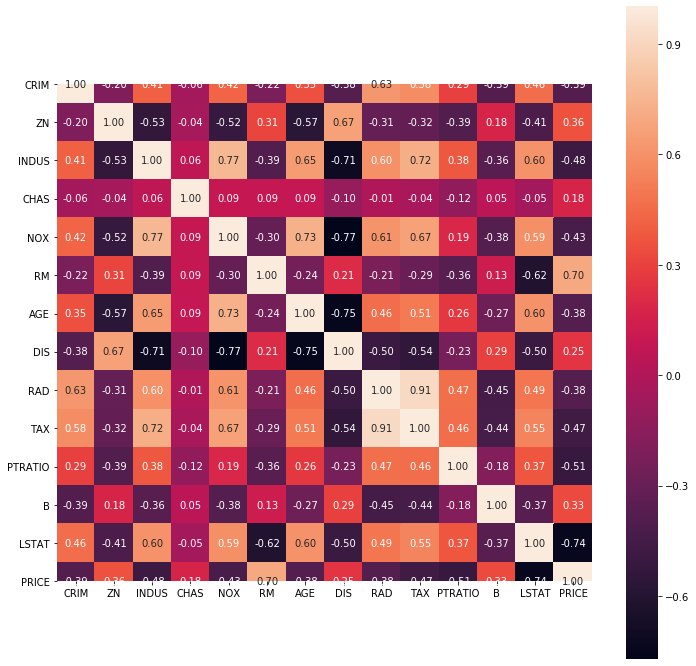

In [36]:
plt.figure(figsize=(12,12))
sns.heatmap(norm_data.cov(), square=True, annot=True, fmt='.2f');

Bir de korelasyon matrisini hatırlayalım:


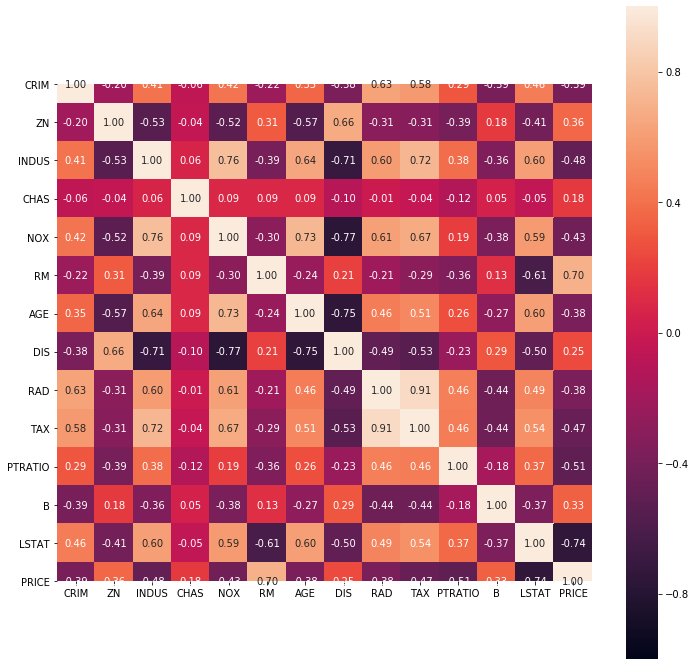

In [37]:
print('Bir de korelasyon matrisini hatırlayalım:')
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, square=True, annot=True, fmt='.2f')
plt.show()